# Gráfico de Barras
Un gráfico simple pero efectivo. Nos sirve para mostrar diferencias de magnitudes de variables numéricas a lo largo de diferentes grupos o categorias.    
**Eje X**: Variable categórica   
**Eje Y**: Variable numérica   
**Otros nombres**: Gráfico de Columnas, Bar Plot   
**Variantes**: Gráfico de Barras Multiples, Gráfico de Barras Apiladas

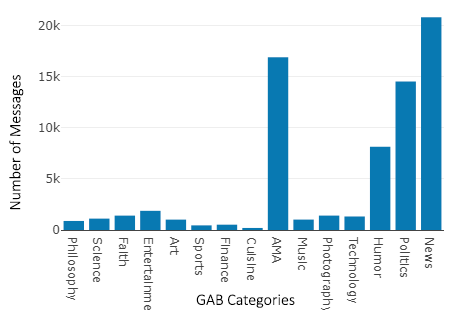

### Cuando utilizar
- Comparar variables numéricas de diferentes grupos en mis datos
- Quiero enfatizar cambios en magnitud

### Cuando no utilizar (recomendaciones)
- Si quiero comparar los valores de muchas categorias. Ya que el Eje X se vuelve muy denso.
- Si mis puntos de interés son los puntos individuales de mi dataset. Ya que el Eje X se volverá muy denso.
- Si mi objetivo es comparar proporciones porcentuales o partes de un todo. 
- Si quiero obtener información sobre las distribuciones de mis variables.

### Ejemplos de Uso
- Si soy dueño de una página web, me gustaría saber cuantas personas visitan mi página desde un Celular, Tablet o PC de escritorio.
- En un banco, me interesaría saber el número de cuentas abiertas cada año
- En un supermercado, me gustaría saber el valor total de ventas de cada mes en un año


### Consejos
- No utilices colores en las barras innecesariamente.
- Empieza el eje Y en el valor del "cero". Asi no vas a "disfrazar" cambios de magnitudes irrelevantes **(Ver primera imágen de abajo)**
- Si las variables categoricas guardan un orden (Ejemplo: años, meses, horas), se recomienda ordenar las columnas. Del mismo modo si quieres enfatizar que es un "Top" (en cuyo caso las barras se ordenarian segun el valor en el Eje Y). 
- No hacer las barras "tridimensionales" o con formas extrañas que puedan cofundir al lector acerca del valor en el eje Y **(Ver segunda imágen de abajo)**
- Barras verticales o horizontales? No hay preferencia. Puede depender de cuantas categorías quiero mostrar o del tamaño de mis etiquetas categóricas

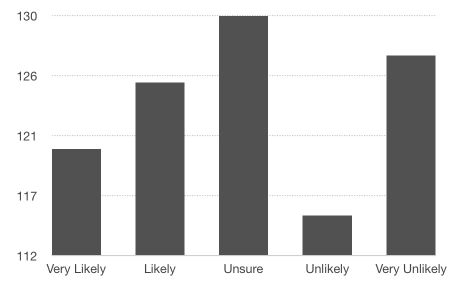
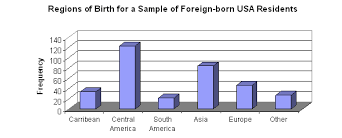

## En esta clase
### Datos
Información sobre los pasajeros del Titanic
### Objetivo
1. Cuantos pasajeros HOMBRES y cuantas pasajeras MUJERES habian en el Titanic?

## Referencias
- https://datavizcatalogue.com/ES/metodos/graficos_de_barras.html
- https://chartio.com/learn/charts/bar-chart-complete-guide/
- https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch9/bargraph-diagrammeabarres/5214818-eng.htm

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Leemos los datos con Pandas
df = pd.read_csv('../data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Agrupamos por Sexo y contamos cuantos registros hay en cada grupo
pasajeros = df.groupby('Sex').count()
pasajeros

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [6]:
pasajeros = df.groupby('Sex').agg(
    {
        'PassengerId':'count'
    }
)
pasajeros

,PassengerId
Sex,
female,314
male,577


# Pandas

<Axes: title={'center': 'Numero de Pasajeros por Sexo'}, xlabel='Sex'>

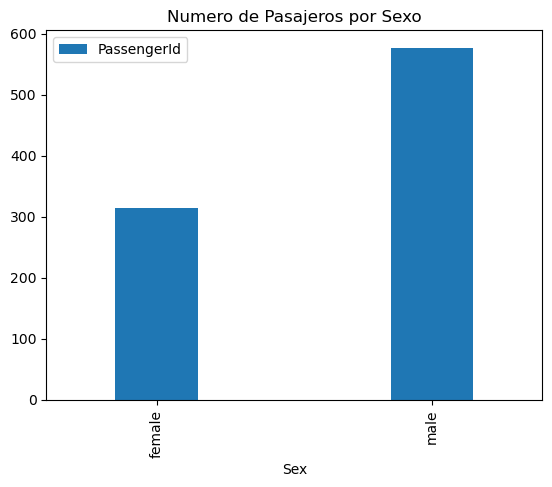

In [10]:
# Grafico de Barras con Pandas (matplotlib)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
pasajeros.plot.bar(
    y='PassengerId', 
    title='Numero de Pasajeros por Sexo',
    width=0.3
)

<Axes: title={'center': 'Numero de Pasajeros por Sexo'}, xlabel='Sex'>

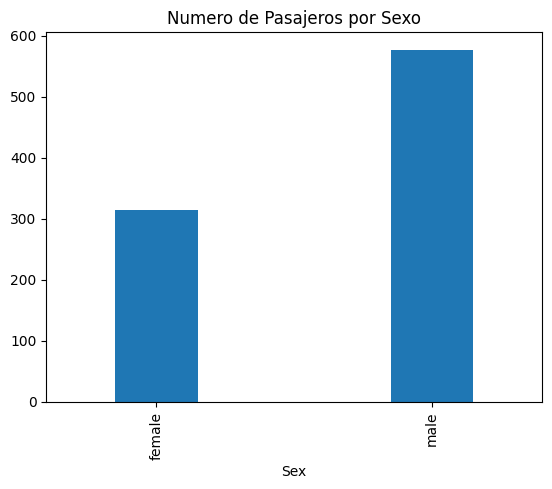

In [5]:
pasajeros.plot.bar(
    y='PassengerId', 
    title='Numero de Pasajeros por Sexo',
    width=0.3,
    legend=False
)

In [11]:
import seaborn as sns

In [12]:
pasajeros

,PassengerId
Sex,
female,314
male,577


In [14]:
# Para tener 'Sex' como una columna
pasajeros2 = pasajeros.reset_index()
pasajeros2

,Sex,PassengerId
0,female,314
1,male,577


# Seaborn

[Text(0.5, 1.0, 'Numero de Pasajeros por Sexo')]

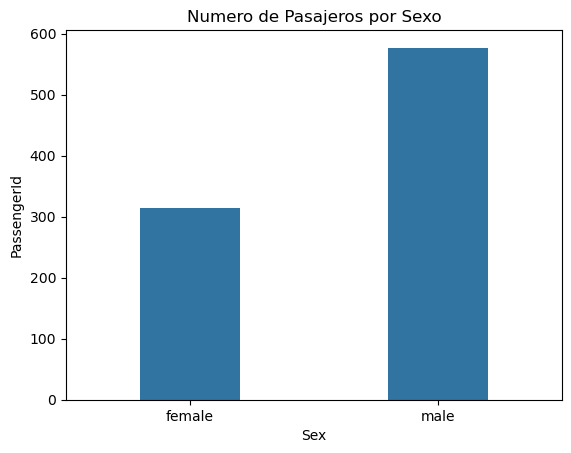

In [15]:
# Grafico de Barras con Seaborn
# https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(
    pasajeros2, 
    x='Sex', 
    y='PassengerId', 
    width=0.4
).set(title='Numero de Pasajeros por Sexo')

# Matplotlib

In [16]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Numero de Pasajeros por Sexo')

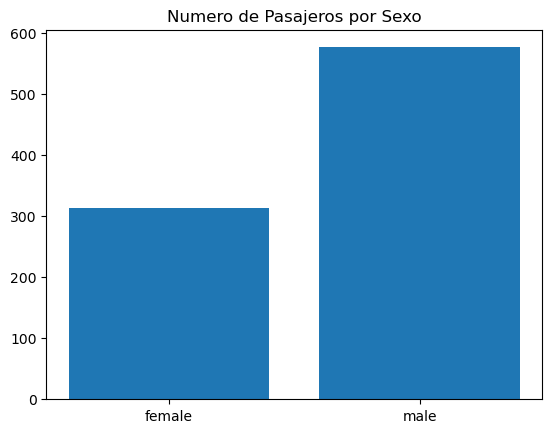

In [20]:
# Grafico de Barras con Matplotlib sin pandas
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
plt.bar(
    pasajeros2['Sex'],
    pasajeros2['PassengerId']
)
plt.title('Numero de Pasajeros por Sexo')


Text(0.5, 1.0, 'Numero de Pasajeros por Sexo')

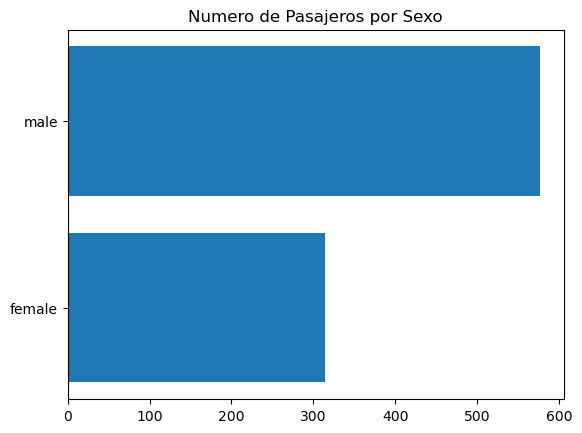

In [21]:
plt.barh(
    pasajeros2['Sex'],
    pasajeros2['PassengerId']
)
plt.title('Numero de Pasajeros por Sexo')


# Ejemplos Adicionales

Text(0.5, 1.0, 'Tipos de Cuenta creadas en el año 2015')

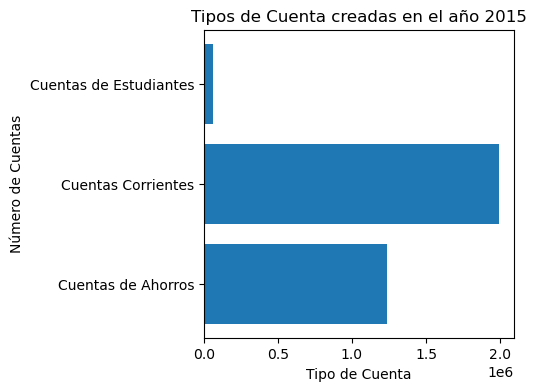

In [22]:
plt.figure(
    figsize=(4, 4)
)
plt.barh(
    ['Cuentas de Ahorros', 'Cuentas Corrientes', 'Cuentas de Estudiantes'],
    [1239528, 1992827, 58889]
)
plt.ylabel('Número de Cuentas')
plt.xlabel('Tipo de Cuenta')
plt.title('Tipos de Cuenta creadas en el año 2015')

Text(0.5, 1.0, 'Ventas en el año 2020')

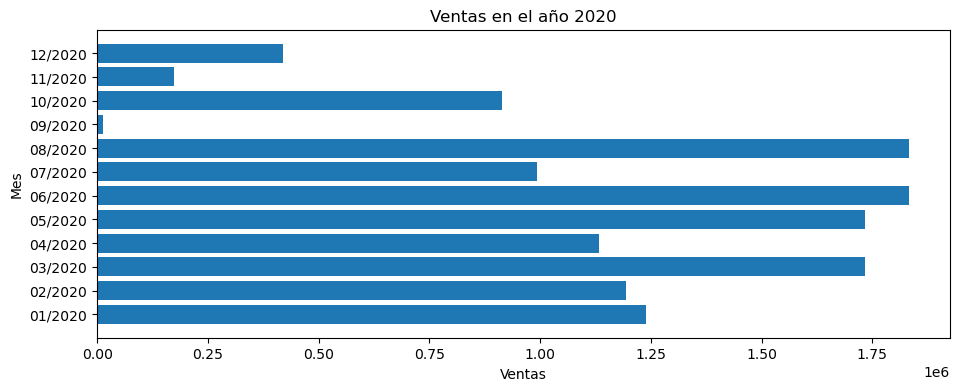

In [23]:
plt.figure(
    figsize=(11, 4)
)
plt.barh(
    ['01/2020', '02/2020', '03/2020', '04/2020', '05/2020', '06/2020', '07/2020', '08/2020', '09/2020', '10/2020', '11/2020', '12/2020', '01/2020', '02/2020', '03/2020', '04/2020', '05/2020', '06/2020', '07/2020', '08/2020', '09/2020', '10/2020', '11/2020', '12/2020', '01/2020', '02/2020', '03/2020', '04/2020', '05/2020', '06/2020', '07/2020', '08/2020', '09/2020', '10/2020', '11/2020', '12/2020'],
    [1239528, 1192827, 1732827, 1132827, 1732827, 1832827, 992827, 1832827, 12827, 912827, 172827, 419827, 1239528, 1192827, 1732827, 1132827, 1732827, 1832827, 992827, 1832827, 12827, 912827, 172827, 419827, 1239528, 1192827, 1732827, 1132827, 1732827, 1832827, 992827, 1832827, 12827, 912827, 172827, 419827],
)
plt.ylabel('Mes')
plt.xlabel('Ventas')
plt.title('Ventas en el año 2020')

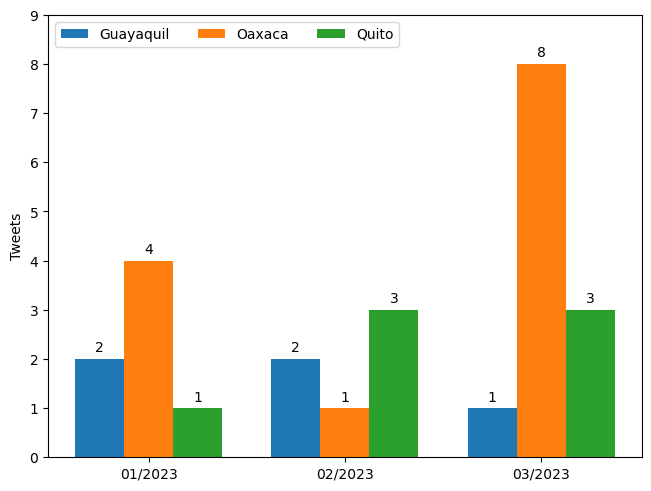

In [24]:
import matplotlib.pyplot as plt
import numpy as np

species = ("01/2023", "02/2023", "03/2023")
penguin_means = {
    'Guayaquil': (2, 2, 1),
    'Oaxaca': (4, 1, 8),
    'Quito': (1, 3, 3),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Tweets')
#ax.set_title('Mes / Ciudad')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 9)

plt.show()